<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%2013%EC%9D%BC/12%EC%9B%94_13%EC%9D%BC_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble)
- 여러 개의 모델 사용해 결론 도촐
- Voting
  -> hard voting : 서로 다른 모델 사용해서 다수결로 결정
  -> soft voting : 서로 다른 모델 사용은 동일 but, 확률의 평균으로 결정
- Bagging
  -> 같은 모델 n개 사용하여 해결
  -> 병렬
- Boost
  -> 모델로 평가 후 해당 모델 업그레이드 후 계속 진행
  -> 순차적

In [ ]:
# 앙상블을 구현해 보아요
# Voting을 iris를 가지고 구현
# 모델은 knn, svm, decision tree 3개 사용

# 필요 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(iris.data,
                  columns = iris.feature_names)
df.columns = ['sepal_height','sepal_width','petal_height','petal_width']
df['target'] = iris.target

# 결측치, 이상치는 없다고 가정
# 중복 데이터 정리
df = df.drop_duplicates()

# 데이터셋 준비
x_data = df.drop('target',axis=1,inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

In [ ]:
# KNN 구현
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_data_train_norm,
        t_data_train)
knn_acc = accuracy_score(t_data_test, knn.predict(x_data_test_norm))
print(f'KNN 모델의 정확도 : {knn_acc}')

# SVM 구현
svm = SVC(kernel='linear',
          C=0.5,
          probability=True)

svm.fit(x_data_train_norm,
        t_data_train)
svm_acc = accuracy_score(t_data_test, svm.predict(x_data_test_norm))
print(f'SVM 모델의 정확도 : {svm_acc}')

# DT 구현
dt = DecisionTreeClassifier()

dt.fit(x_data_train_norm,
        t_data_train)
dt_acc = accuracy_score(t_data_test, dt.predict(x_data_test_norm))
print(f'DT 모델의 정확도 : {dt_acc}')

KNN 모델의 정확도 : 0.9777777777777777
SVM 모델의 정확도 : 0.9777777777777777
DT 모델의 정확도 : 0.9777777777777777


In [ ]:
# 앙상블 모델을 만들어요!
# hard voting classifier(hvc)
hvc = VotingClassifier(estimators=[('KNN',knn),
                                   ('SVM',svm),
                                   ('DT',dt)],
                       voting='hard')

hvc.fit(x_data_train_norm, t_data_train)
hvc_acc = accuracy_score(t_data_test, hvc.predict(x_data_test_norm))
print(f'앙상블 모델(hard voting)의 accuracy : {hvc_acc}')

# soft voting classifier(svc)
svc = VotingClassifier(estimators=[('KNN',knn),
                                   ('SVM',svm),
                                   ('DT',dt)],
                       voting='soft')

svc.fit(x_data_train_norm, t_data_train)
svc_acc = accuracy_score(t_data_test, svc.predict(x_data_test_norm))
print(f'앙상블 모델(soft voting)의 accuracy : {svc_acc}')

앙상블 모델(hard voting)의 accuracy : 0.9777777777777777
앙상블 모델(soft voting)의 accuracy : 0.9777777777777777


In [ ]:
%reset

# 앙상블 Bagging을 구현해 보아요!
# Decision Tree를 모아서 만든 Random Forest를 구현

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(iris.data,
                  columns = iris.feature_names)
df.columns = ['sepal_height','sepal_width','petal_height','petal_width']
df['target'] = iris.target

# 결측치, 이상치는 없다고 가정
# 중복 데이터 정리
df = df.drop_duplicates()

# 데이터셋 준비
x_data = df.drop('target',axis=1,inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

# DT 구현
dt = DecisionTreeClassifier()

dt.fit(x_data_train_norm,
        t_data_train)
dt_acc = accuracy_score(t_data_test, dt.predict(x_data_test_norm))
print(f'DT 모델의 정확도 : {dt_acc}')

# Random Forest 구현
# n_estimators = decision tree의 개수
# max_depth = 트리의 높이 지정
rcf = RandomForestClassifier(n_estimators=50,
                             max_depth=3,
                             random_state=20)

rcf.fit(x_data_train_norm, t_data_train)
rcf_acc = accuracy_score(t_data_test, rcf.predict(x_data_test_norm))
print(f'RandomForest 모델의 accuracy : {rcf_acc}')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
DT 모델의 정확도 : 0.9555555555555556
RandomForest 모델의 accuracy : 1.0


In [ ]:
# 앙상블 boost
%reset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier
# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(iris.data,
                  columns = iris.feature_names)
df.columns = ['sepal_height','sepal_width','petal_height','petal_width']
df['target'] = iris.target

# 결측치, 이상치는 없다고 가정
# 중복 데이터 정리
df = df.drop_duplicates()

# 데이터셋 준비
x_data = df.drop('target',axis=1,inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

xgb = XGBClassifier(n_estimators=50,
                    max_depth=3,
                    random_state=20)
xgb.fit(x_data_train_norm, t_data_train)
xgb_acc = accuracy_score(t_data_test, xgb.predict(x_data_test_norm))
print(f'XGB 모델의 정확도 : {xgb_acc}')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
XGB 모델의 정확도 : 0.9555555555555556


In [ ]:
# 최초의 neural network => Perceptron
# 아주 간단하게 생각하면 logistic regression과 같아요!
# 대신에 activation 함수를 logistic은 sigmoid를 이용해요
# 하지만 Perceptron은 activation함수로 step function을 사용해요!

# 이런 Perceptron은 각종 GATE연산을 학습할 수 있으면
# 이를 이용해서 AI를 만들 수 있겠다라고 당시에 생각했어요!
# 여기서 말하는 GATE연산은(AND, OR, NOR, XOR, ...)

# 우리도 Perceptron이 GATE연산을 학습할 수 있는지 확인하기 위해
# Logistic Regression을 이용해서 GATE연산을 학습해 볼꺼예요!

# Tensorflow Keras로 구현해 보아요!
# AND, OR, XOR 연산만 해 보아요!

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Training Data Set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]], dtype=np.float32)

#  AND 연산
# t_data = np.array([[0],[0],[0],[1]], dtype=np.float32)

# OR 연산
t_data = np.array([[0],[1],[1],[1]],dtype=np.float32)

# XOR
# t_data = np.array([[0],[1],[1],[0]],dtype=np.float32)

model = Sequential()

model.add(Flatten(input_shape=(2,)))
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_data,
          t_data,
          epochs=10000,
          verbose=0)

print(f'정확도는 : {model.evaluate(x_data,t_data)}')
# 정확도는 : [0.0003106207004748285, 1.0]

# 정확도는 : [0.0003516915312502533, 1.0] => AND 연산에 대한 학습 결과
# 정확도는 : [0.00015051690570544451, 1.0] => OR 연산에 대한 학습 결과
# 정확도는 : 정확도는 : [1.5216578219678922e-08, 1.0] => XOR 연산에 대한 학습 결

1/1 [==============================] - 0s 116ms/step - loss: 9.8468e-05 - acc: 1.0000
정확도는 : [9.846834291238338e-05, 1.0]


In [ ]:
# 이번에는 다중 layer perceptron을 이용해서 GATE연산을 학습해 볼꺼예요!

# Tensorflow Keras로 구현해 보아요!
# AND, OR, XOR 연산만 해 보아요!

import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Training Data Set
x_data = np.array([[0,0],
                   [0,1],
                   [1,0],
                   [1,1]], dtype=np.float32)

# AND 연산
t_data = np.array([[0],[0],[0],[1]], dtype=np.float32)

# OR 연산
# t_data = np.array([[0],[1],[1],[1]],dtype=np.float32)

# XOR
# t_data = np.array([[0],[1],[1],[0]],dtype=np.float32)

# model
model = Sequential()

# Input layer
model.add(Flatten(input_shape=(2,)))

# 여러개의 Hidden Layer
# Hidden Layer는 Dense layer를 사용해요!
# Hidden Layer의 units => hyperparameter
model.add(Dense(units=10,
                activation='relu'))
model.add(Dense(units=6,
                activation='relu'))

# Output layer
model.add(Dense(units=1,
                activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_data,
          t_data,
          epochs=30000,
          verbose=0)

print(f'정확도는 : {model.evaluate(x_data,t_data)}')

1/1 [==============================] - 0s 167ms/step - loss: 6.2425e-09 - acc: 1.0000
정확도는 : [6.242514061227666e-09, 1.0]


In [ ]:
# 기존에 실습했던 MNIST 데이터 셋을
# 두가지로 구현해볼 예정이에요

# 1. Logistic Regression을 이용해서 Multinomial Classification
# 2. DNN으로 Multinomial Classification 구현을 해 볼꺼예요!

%reset

import numpy as np
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')
df

# 데이터셋 준비
x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터셋 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

# 모델 생성
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Output Layer
model.add(Dense(units=10,
                activation='softmax'))

# 설정
model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy')

# 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    verbose=1)

# 평가
print(model.evaluate(x_data_test_norm, t_data_test))

Epoch 1/100
236/236 [==============================] - 1s 3ms/step - loss: 0.4194 - val_loss: 0.2971
Epoch 2/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2944 - val_loss: 0.3009
Epoch 3/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2743 - val_loss: 0.2882
Epoch 4/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2650 - val_loss: 0.2902
Epoch 5/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2540 - val_loss: 0.2946
Epoch 6/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2497 - val_loss: 0.2964
Epoch 7/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2437 - val_loss: 0.2945
Epoch 8/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2388 - val_loss: 0.3173
Epoch 9/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2335 - val_loss: 0.3137
Epoch 10/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2301 - val_lo

In [ ]:
import tensorflow as tf
predict = tf.argmax(model.predict(x_data_test_norm),axis=1).numpy()
print(classification_report(t_data_test, predict))

394/394 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1240
           1       0.94      0.98      0.96      1405
           2       0.91      0.85      0.88      1253
           3       0.85      0.89      0.87      1305
           4       0.90      0.93      0.91      1222
           5       0.84      0.85      0.85      1139
           6       0.92      0.95      0.93      1241
           7       0.92      0.91      0.92      1320
           8       0.88      0.85      0.86      1219
           9       0.87      0.89      0.88      1256

    accuracy                           0.90     12600
   macro avg       0.90      0.90      0.90     12600
weighted avg       0.90      0.90      0.90     12600



In [ ]:
#MNIST를 Deep Network로 구현해 보아요!
# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')
df

# 데이터셋 준비
x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터셋 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

# Model 구현(Regression Model 구현)
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Hidden Layer
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=128,
                activation='relu'))

# Output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# model.summary()
# 모델 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    verbose=1)
# 모델 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))

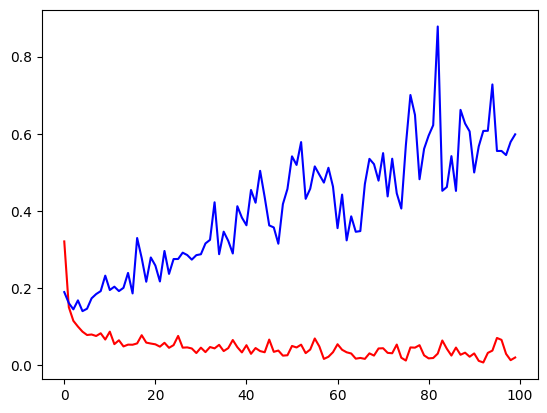

In [ ]:
# 우리 model이 잘 만들어진 모델인지 확인!!!
# 그래프를 이용해서 확인해보는게 좋아요!
# 학습할때 학습데이터로 loss, acc를 구하고
#          validation data로 val_loss, val_acc를 구하게 되는데
# 이 둘간의 그래프를 비교해보면 overfitting의 정도를 확인!
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.show()

In [ ]:
# MNIST 데이터를 Deep Network로 구현해 보아요!
# Tensorflow Keras가 제공하는 여러 기능이 있는데
# 그 중 필수적으로 사용하는 기능들이 있어요
# 대표적인게 Early Stopping(조기종료) 기능이예요!

# Raw Data Loading
df = pd.read_csv('/content/drive/MyDrive/AI스쿨 파일/ML/MNIST/train.csv')
df

# 데이터셋 준비
x_data = df.drop('label',axis=1,inplace=False).values
t_data = df['label'].values

# 정규화 진행
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터셋 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

# Model 구현(Regression Model 구현)
model = Sequential()

# Input Layer
model.add(Flatten(input_shape=(784,)))

# Hidden Layer
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=128,
                activation='relu'))

# Output layer
model.add(Dense(units=10,
                activation='softmax'))

model.compile(optimizer=Adam(learning_rate=1e-2),
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

# Early Stopping Callback 설정
from tensorflow.keras.callbacks import EarlyStopping

# monitor : 조기 종료의 기준
# patience : loss값이 증가하는걸 몇번참을것인가에 대한 숫자.
# patience는 모델이 정상적으로 돌아오면 다시 초기화
es_cb = EarlyStopping(monitor='val_loss',
                      patience=5,
                      restore_best_weights=True)

# 모델 학습
history = model.fit(x_data_train_norm,
                    t_data_train,
                    epochs=100,
                    batch_size=100,
                    validation_split=0.2,
                    callbacks=[es_cb],
                    verbose=1)
# 모델 평가
print(model.evaluate(x_data_test_norm,
                     t_data_test))

Epoch 1/100
236/236 [==============================] - 4s 12ms/step - loss: 0.3004 - acc: 0.9070 - val_loss: 0.1630 - val_acc: 0.9491
Epoch 2/100
236/236 [==============================] - 2s 10ms/step - loss: 0.1469 - acc: 0.9545 - val_loss: 0.1294 - val_acc: 0.9621
Epoch 3/100
236/236 [==============================] - 3s 12ms/step - loss: 0.1124 - acc: 0.9674 - val_loss: 0.1752 - val_acc: 0.9498
Epoch 4/100
236/236 [==============================] - 3s 12ms/step - loss: 0.0979 - acc: 0.9704 - val_loss: 0.1663 - val_acc: 0.9527
Epoch 5/100
236/236 [==============================] - 3s 12ms/step - loss: 0.0893 - acc: 0.9739 - val_loss: 0.1565 - val_acc: 0.9575
Epoch 6/100
236/236 [==============================] - 3s 12ms/step - loss: 0.0792 - acc: 0.9770 - val_loss: 0.1750 - val_acc: 0.9573
Epoch 7/100
394/394 [==============================] - 1s 2ms/step - loss: 0.1435 - acc: 0.9574
[0.14347082376480103, 0.9573809504508972]
